***
# Exploration des données
***

Note : 
Extraire les nom propres
faire une liste des mots les plus populaires
Analyser les émoji
L'usage de majuscule
Graph les top mot par catégorie

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
# ====== Idées ====== #
# Ajout d'une variable confinement 

***
Merge les données
***

In [2]:
df_post = pd.read_csv('Posts.csv')
df_post.head(2)

,attachments.data,created_time,id,mainTopic,message,permalink_url,secondTopic,shares,title
0,"[{""title"":""Une électrification à « la mesure d...",2023-06-02T16:53:58+0000,192978590727638_722512569880131,consommation,CHRONIQUE / La Société des traversiers du Québ...,https://www.facebook.com/553956616735728/posts...,auto,0,Une électrification à « la mesure des besoins ...
1,"[{""title"":""Les incohérences de l’ingérence"",""u...",2023-06-02T16:03:24+0000,192978590727638_722477749883613,composer-preview,HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...,https://www.facebook.com/553956616735728/posts...,7FJ4TUHKEFEXFIZI6DY2WAQE4E,0,Les incohérences de l’ingérence


In [3]:
df_comments = pd.read_csv('Comments.csv')
df_comments.head(2)

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,created_time,id,like_count,message,parent,postId
0,0.102216,0.651296,0.664565,0.350583,0.029933,0.588517,0,2023-06-02T16:06:59+0000,722477749883613_788168749338745,0,"Faux, ce ne sera jamais le temps pour lui car ...",NaN,192978590727638_722477749883613
1,0.005476,0.167515,0.255499,0.006981,0.005647,0.176317,1,2023-06-02T16:21:43+0000,722477749883613_1593974021087773,1,Mon dieu!! On nous prend sérieusement pour des...,NaN,192978590727638_722477749883613


In [4]:
df_merge = pd.merge(df_comments, df_post, left_on='postId', right_on='id', indicator=True)
df_merge.head(2)

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,created_time_x,id_x,like_count,message_x,parent,postId,attachments.data,created_time_y,id_y,mainTopic,message_y,permalink_url,secondTopic,shares,title,_merge
0,0.102216,0.651296,0.664565,0.350583,0.029933,0.588517,0,2023-06-02T16:06:59+0000,722477749883613_788168749338745,0,"Faux, ce ne sera jamais le temps pour lui car ...",NaN,192978590727638_722477749883613,"[{""title"":""Les incohérences de l’ingérence"",""u...",2023-06-02T16:03:24+0000,192978590727638_722477749883613,composer-preview,HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...,https://www.facebook.com/553956616735728/posts...,7FJ4TUHKEFEXFIZI6DY2WAQE4E,0,Les incohérences de l’ingérence,both
1,0.005476,0.167515,0.255499,0.006981,0.005647,0.176317,1,2023-06-02T16:21:43+0000,722477749883613_1593974021087773,1,Mon dieu!! On nous prend sérieusement pour des...,NaN,192978590727638_722477749883613,"[{""title"":""Les incohérences de l’ingérence"",""u...",2023-06-02T16:03:24+0000,192978590727638_722477749883613,composer-preview,HÉLÈNE BUZZETTI / Jagmeet Singh a soutenu que ...,https://www.facebook.com/553956616735728/posts...,7FJ4TUHKEFEXFIZI6DY2WAQE4E,0,Les incohérences de l’ingérence,both


In [5]:
# Analyse du merge 
unique_list = []
for value in df_merge['_merge'].unique():
    unique_list.append(value)
print(unique_list)
print('Tous les lignes merge')

['both']
Tous les lignes merge


***
Visualisation
***

In [6]:
# Analyse statistique
df_merge.describe()

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,like_count,shares
count,9.356980e+05,935698.000000,935698.000000,9.356980e+05,935698.000000,935698.000000,935698.000000,935698.000000,935698.000000
mean,1.141216e-02,0.108959,0.052533,1.360216e-02,0.010173,0.102460,0.520507,1.321623,285.970075
std,4.006699e-02,0.162994,0.119968,5.610636e-02,0.035129,0.140141,2.988751,5.972633,1853.642335
min,3.613072e-08,0.002280,0.000000,3.725290e-08,0.000000,0.000005,0.000000,0.000000,0.000000
25%,5.225947e-04,0.009470,0.008879,4.220009e-04,0.005321,0.008294,0.000000,0.000000,7.000000
50%,1.581658e-03,0.027476,0.011270,1.215935e-03,0.005495,0.034277,0.000000,0.000000,27.000000
75%,5.475683e-03,0.136078,0.022150,4.673004e-03,0.006233,0.151034,0.000000,1.000000,110.000000
max,9.491525e-01,0.973575,0.998037,9.502075e-01,0.968038,0.981763,252.000000,836.000000,25872.000000


In [20]:
# Valeurs manquantes
print('Missing value')
print('*'*25)
print(f'Nombre de lignes : {len(df_merge)}')
for col in df_merge.columns.to_list():
    nb_na = df_merge[col].isna().sum()
    perc = round(df_merge[col].isna().sum()/len(df_merge)*100)
    print(f'{col.ljust(20)} : {str(nb_na).rjust(10)} ({perc}%)')

Missing value
*************************
Nombre de lignes : 935698
IDENTITY_ATTACK      :          0 (0%)
INSULT               :          0 (0%)
PROFANITY            :          0 (0%)
SEVERE_TOXICITY      :          0 (0%)
THREAT               :          0 (0%)
TOXICITY             :          0 (0%)
comment_count        :          0 (0%)
created_time_x       :          0 (0%)
id_x                 :          0 (0%)
like_count           :          0 (0%)
message_x            :          0 (0%)
parent               :     459661 (49%)
postId               :          0 (0%)
attachments.data     :         35 (0%)
created_time_y       :          0 (0%)
id_y                 :          0 (0%)
mainTopic            :       8481 (1%)
message_y            :      10158 (1%)
permalink_url        :          0 (0%)
secondTopic          :      67076 (7%)
shares               :          0 (0%)
title                :       8457 (1%)
_merge               :          0 (0%)


In [47]:
# Data type
for col in df_merge.columns:
    print(f'{col.ljust(20)}: {df_merge[col].dtype}')

IDENTITY_ATTACK     : float64
INSULT              : float64
PROFANITY           : float64
SEVERE_TOXICITY     : float64
THREAT              : float64
TOXICITY            : float64
comment_count       : int64
created_time_x      : object
id_x                : object
like_count          : int64
message_x           : object
parent              : object
postId              : object
attachments.data    : object
created_time_y      : object
id_y                : object
mainTopic           : object
message_y           : object
permalink_url       : object
secondTopic         : object
shares              : int64
title               : object
_merge              : category
year_x              : int32


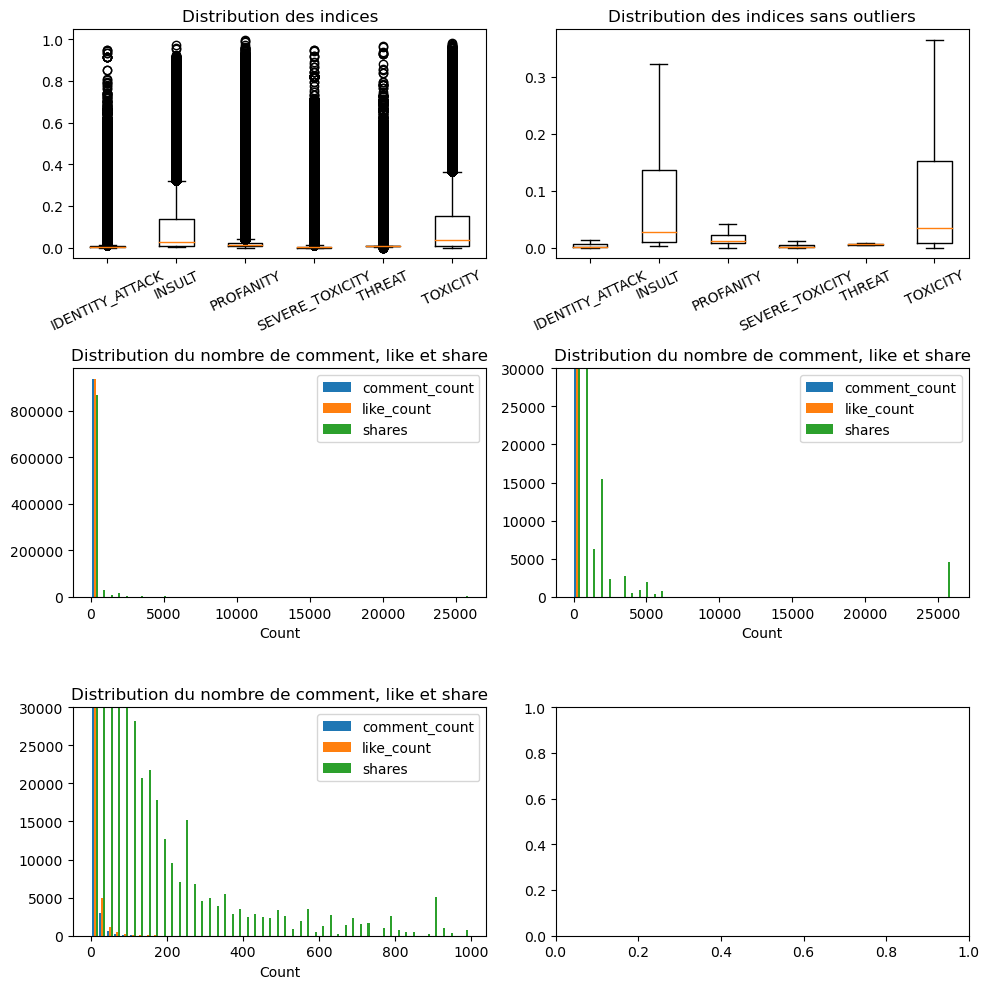

In [22]:
#====== Attributs numériques ======#

# 	    ['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY', 'comment_count', 'like_count', 'shares']
#   - Boxplot avec courbe pour les indices
#   - histogramme pour comment_count, like_count, shares

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

indice_df = df_merge[['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY']]
cols_indice = ['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY']
cols_count = ['comment_count', 'like_count', 'shares']
filtered_data = df_merge.loc[(df_merge['comment_count']<1000) & (df_merge['like_count']<1000) & (df_merge['shares']<1000)]


figure, axis = plt.subplots(3,2, figsize=(10,10))

# variable indice 
axis[0, 0].boxplot(indice_df)
axis[0, 0].set_title('Distribution des indices')
axis[0, 0].set_xticklabels(cols_indice, rotation=25)

# variable indice sans outliers
axis[0, 1].boxplot(indice_df, showfliers=False)
axis[0, 1].set_title('Distribution des indices sans outliers')
axis[0, 1].set_xticklabels(cols_indice, rotation=25)

# Comment_count, like_count, shares
axis[1, 0].hist(df_merge[['comment_count', 'like_count', 'shares']], bins=50)
axis[1, 0].set_title('Distribution du nombre de comment, like et share')
axis[1, 0].set_xlabel('Count')
axis[1, 0].legend(cols_count)

axis[1, 1].hist(df_merge[['comment_count', 'like_count', 'shares']], bins=50)
axis[1, 1].set_title('Distribution du nombre de comment, like et share')
axis[1, 1].set_xlabel('Count')
axis[1, 1].legend(cols_count)
axis[1, 1].set_ylim(0, 30000)

axis[2, 0].hist(filtered_data[['comment_count', 'like_count', 'shares']], bins=50)
axis[2, 0].set_title('Distribution du nombre de comment, like et share')
axis[2, 0].set_xlabel('Count')
axis[2, 0].legend(cols_count)
axis[2, 0].set_ylim(0, 30000)

figure.tight_layout()
plt.show()

In [ ]:
#====== Attributs catégoriques ======#

#       ['attachments.data', 'message_x', 'message_y', 'mainTopic, 'secondTopic', 'title']
#   - Extraire l'info de attachments.data
#   - Renommer message_x : message_commentaire, message_y : message_post
#   - Graph histogramme avec les top 20 'mainTopic, 'secondTopic'

#   - mettre les phrase en liste de mots et comptabiliser les mots qui ressort le plus : 'message_x', 'message_y', 'title' 
#   - Voir graph avec plein de mots

In [ ]:
#====== Mesures Statistiques ======#
# Moyenne, médiane, mode
# Corrélation 
#   - Scatter plot
#   - heat map
# Outliers

# Pour attributs catégoriques : encoder???


In [21]:
#====== Analyse de la période de temps ======#

# ['created_time_x', 'created_time_y']
print(max(df_merge['created_time_x']))
print(min(df_merge['created_time_x']))

print(max(df_merge['created_time_y']))
print(min(df_merge['created_time_y']))

# Voir s'il y a augmentation de post associé à des événements marquants au cours de cette période
# Saisonnalité?
# Covid


2023-06-15T19:42:20+0000
2020-02-27T21:54:07+0000
2023-06-02T16:03:24+0000
2020-02-27T21:27:34+0000


C:\Users\segch001\AppData\Local\Temp\ipykernel_23060\2853082203.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[0].set_xticklabels(labels=group_year['year_x'], rotation=90)
C:\Users\segch001\AppData\Local\Temp\ipykernel_23060\2853082203.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis[1].set_xticklabels(labels=group_year_month['year_month_x'], rotation=90)


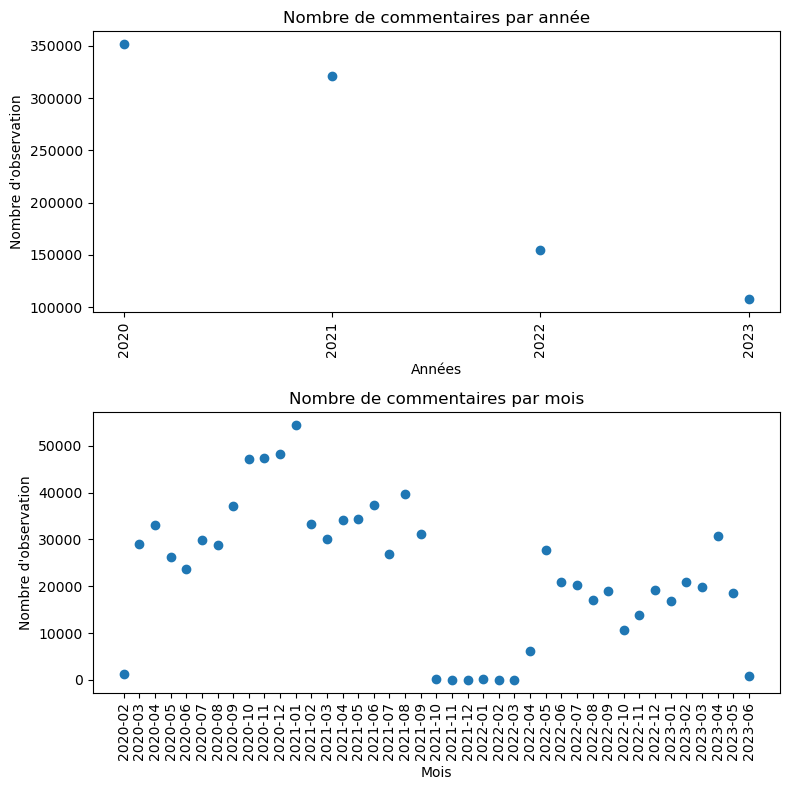

In [105]:
df_merge['year_x'] = df_merge['created_time_x'].str[0:4]
df_merge['month_x'] = df_merge['created_time_x'].str[5:7].astype(int)
df_merge['year_month_x'] =  df_merge['created_time_x'].str[0:7]

group_year = df_merge.groupby('year_x').size().to_frame('count').reset_index()
group_year

group_year_month = df_merge.groupby('year_month_x').size().to_frame('count').reset_index()
group_year_month

figure, axis = plt.subplots(2,1, figsize=(8,8))
axis[0].scatter(x=group_year['year_x'], y=group_year['count'])
axis[0].set_xticklabels(labels=group_year['year_x'], rotation=90)
axis[0].set_title('Nombre de commentaires par année')
axis[0].set_xlabel('Années')
axis[0].set_ylabel('Nombre d\'observation')

axis[1].scatter(x=group_year_month['year_month_x'], y=group_year_month['count'])
axis[1].set_xticklabels(labels=group_year_month['year_month_x'], rotation=90)
axis[1].set_title('Nombre de commentaires par mois')
axis[1].set_xlabel('Mois')
axis[1].set_ylabel('Nombre d\'observation')

figure.tight_layout()
plt.show()

In [ ]:
#====== Piste de solution ======#
# Extraire les noms de personne (trouver une répertoire de noms?)

In [26]:
df_merge.columns.tolist()

['IDENTITY_ATTACK',
 'INSULT',
 'PROFANITY',
 'SEVERE_TOXICITY',
 'THREAT',
 'TOXICITY',
 'comment_count',
 'created_time_x',
 'id_x',
 'like_count',
 'message_x',
 'parent',
 'postId',
 'attachments.data',
 'created_time_y',
 'id_y',
 'mainTopic',
 'message_y',
 'permalink_url',
 'secondTopic',
 'shares',
 'title',
 '_merge']

***
Commentaires
***

In [2]:
df = pd.read_csv('Comments.csv')
df.head(3)

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,created_time,id,like_count,message,parent,postId
0,0.102216,0.651296,0.664565,0.350583,0.029933,0.588517,0,2023-06-02T16:06:59+0000,722477749883613_788168749338745,0,"Faux, ce ne sera jamais le temps pour lui car ...",NaN,192978590727638_722477749883613
1,0.005476,0.167515,0.255499,0.006981,0.005647,0.176317,1,2023-06-02T16:21:43+0000,722477749883613_1593974021087773,1,Mon dieu!! On nous prend sérieusement pour des...,NaN,192978590727638_722477749883613
2,0.029144,0.269578,0.016753,0.006104,0.005864,0.246033,0,2023-06-02T17:29:58+0000,722477749883613_779062990381463,0,"Denise Morais ..Oui et avec raison ! (Car ""nou...",722477749883613_1593974021087773,192978590727638_722477749883613


In [42]:
# Shape
print(f'Shape: {df.shape}')

# columns names
print(f'Columns name: {df.columns.tolist()}')

Shape: (935698, 13)
Columns name: ['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY', 'comment_count', 'created_time', 'id', 'like_count', 'message', 'parent', 'postId']


In [41]:
# Missing values
print(f'{df.isna().sum()}')

IDENTITY_ATTACK         0
INSULT                  0
PROFANITY               0
SEVERE_TOXICITY         0
THREAT                  0
TOXICITY                0
comment_count           0
created_time            0
id                      0
like_count              0
message                 0
parent             459661
postId                  0
dtype: int64


In [40]:
# Data type
for col in df.columns:
    print(f'{col}: {df[col].dtype}')

IDENTITY_ATTACK: float64
INSULT: float64
PROFANITY: float64
SEVERE_TOXICITY: float64
THREAT: float64
TOXICITY: float64
comment_count: int64
created_time: object
id: object
like_count: int64
message: object
parent: object
postId: object


In [5]:
# Sumerize
df.describe()

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,like_count
count,9.356980e+05,935698.000000,935698.000000,9.356980e+05,935698.000000,935698.000000,935698.000000,935698.000000
mean,1.141216e-02,0.108959,0.052533,1.360216e-02,0.010173,0.102460,0.520507,1.321623
std,4.006699e-02,0.162994,0.119968,5.610636e-02,0.035129,0.140141,2.988751,5.972633
min,3.613072e-08,0.002280,0.000000,3.725290e-08,0.000000,0.000005,0.000000,0.000000
25%,5.225947e-04,0.009470,0.008879,4.220009e-04,0.005321,0.008294,0.000000,0.000000
50%,1.581658e-03,0.027476,0.011270,1.215935e-03,0.005495,0.034277,0.000000,0.000000
75%,5.475683e-03,0.136078,0.022150,4.673004e-03,0.006233,0.151034,0.000000,1.000000
max,9.491525e-01,0.973575,0.998037,9.502075e-01,0.968038,0.981763,252.000000,836.000000


<Axes: >

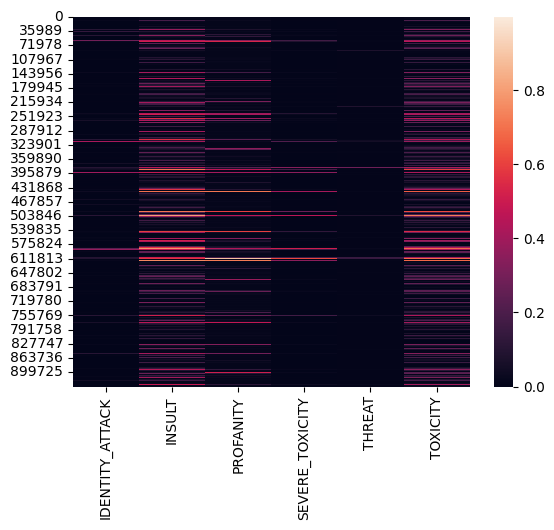

In [8]:
import seaborn as sns
col_selection = ['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT', 'TOXICITY']

sns.heatmap(df[col_selection])

***
Base de donnée jointe
***